In [175]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
## Reading Data set
al=pd.read_excel("Airlines+Data.xlsx")

In [177]:
al

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [178]:
al.head(20)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [179]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [180]:
al.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Data Visualizations

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

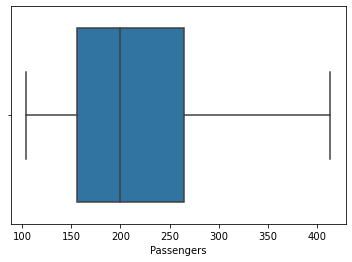

In [181]:
sns.boxplot(al['Passengers'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

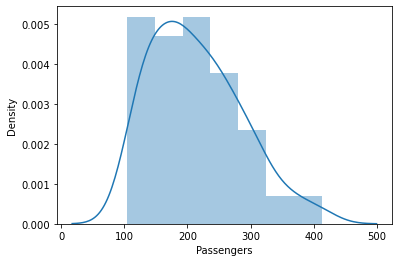

In [182]:
sns.distplot(al['Passengers'])

<AxesSubplot:>

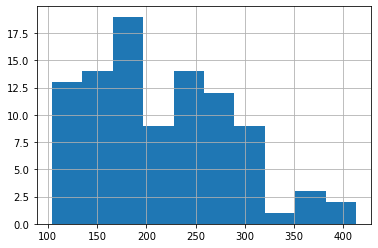

In [183]:
al['Passengers'].hist()

<AxesSubplot:>

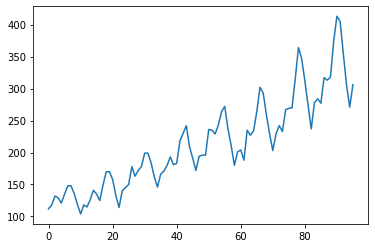

In [184]:
al.Passengers.plot()

In [185]:
## We can observe in above plot data has multiplicative saesonality

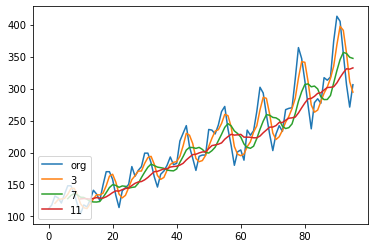

In [186]:
al.Passengers.plot(label="org")
for i in range(3,15,4):
    al["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

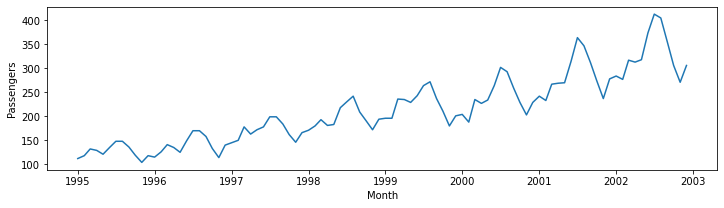

In [187]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=al) 

# Preprocessing

In [188]:
al["month"] = al.Month.dt.strftime("%b") # month extraction
al["year"] = al.Month.dt.strftime("%Y") # year extraction

al["Day"] = al.Month.dt.strftime("%d") # Day extraction

In [189]:
al.head(20)

,Month,Passengers,month,year,Day
0,1995-01-01,112,Jan,1995,01
1,1995-02-01,118,Feb,1995,01
2,1995-03-01,132,Mar,1995,01
3,1995-04-01,129,Apr,1995,01
4,1995-05-01,121,May,1995,01
5,1995-06-01,135,Jun,1995,01
6,1995-07-01,148,Jul,1995,01
7,1995-08-01,148,Aug,1995,01
8,1995-09-01,136,Sep,1995,01
9,1995-10-01,119,Oct,1995,01


In [190]:
dummy=pd.DataFrame(pd.get_dummies(al['month']))
airlines=pd.concat((al,dummy),axis=1)

In [191]:
airlines

,Month,Passengers,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,01,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,01,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,01,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,01,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,01,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,01,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,01,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,01,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,01,0,0,0,0,0,0,0,0,0,1,0,0


In [192]:
t= np.arange(1,97)
airlines['t']=t
airlines['t_square']=airlines['t']*airlines['t']
log_Passengers=np.log(airlines['Passengers'])
airlines['log_Passengers']=log_Passengers

In [193]:
airlines

,Month,Passengers,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,01,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,01,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,01,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,01,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,01,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,01,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,01,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,01,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='month', ylabel='Passengers'>

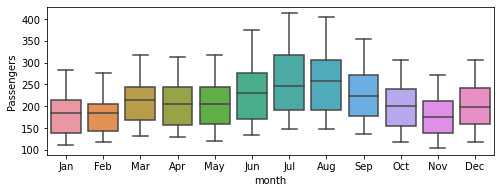

In [194]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

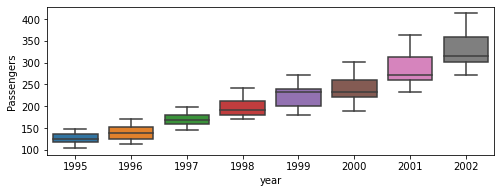

In [195]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="year",y="Passengers",data=airlines)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

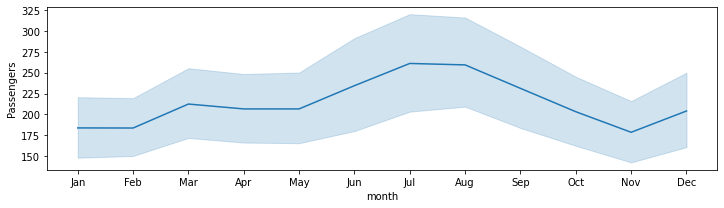

In [196]:
plt.figure(figsize=(12,3))
sns.lineplot(x="month",y="Passengers",data=airlines)

<AxesSubplot:xlabel='month', ylabel='year'>

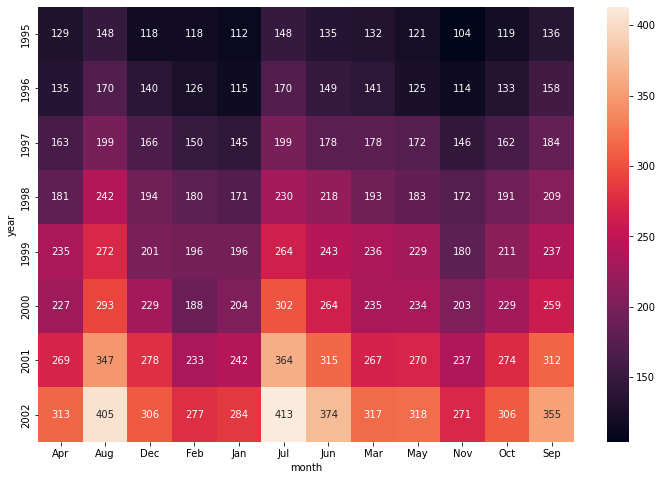

In [197]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

In [198]:
## In above heat map results, we can observe that July & August months have more passengers comparative to other months.

ACF plots and PACF plots

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


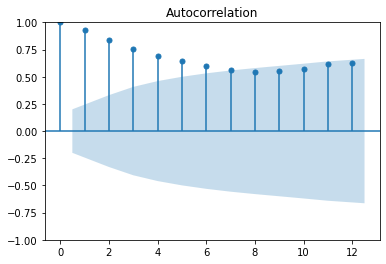

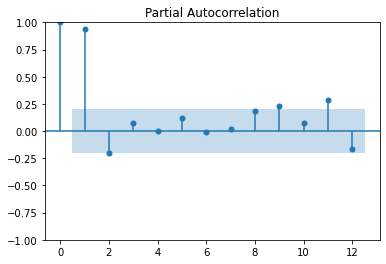

In [199]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show() 
 

# Splitting data

In [200]:
Train = airlines.head(75)
Test = airlines.tail(11)

In [201]:
Train

,Month,Passengers,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,01,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,01,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,01,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,01,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2000-11-01,203,Nov,2000,01,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206
71,2000-12-01,229,Dec,2000,01,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,2001-01-01,242,Jan,2001,01,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,2001-02-01,233,Feb,2001,01,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038


In [202]:
Test

,Month,Passengers,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
85,2002-02-01,277,Feb,2002,01,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,2002-03-01,317,Mar,2002,01,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,Apr,2002,01,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,May,2002,01,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,2002-06-01,374,Jun,2002,01,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,Jul,2002,01,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,2002-08-01,405,Aug,2002,01,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,01,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,01,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,01,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


# Model Based Methods

In [203]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

63.181803205549784

In [204]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

48.829291720030675

In [205]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad 

66.4031517374578

In [206]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea 

147.64105495081057

In [207]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

47.12758226397986

In [208]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

152.88970827813986

In [209]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

12.617156269075274

In [210]:
#Compare the results 

data = {"Model":pd.Series(["linear_model","Exp","Quad","add_sea","add_sea_Quad","Mul_sea","Mul_Add_sea"]),"RMSE":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,Model,RMSE,RMSE_Values
6,Mul_Add_sea,rmse_Mult_add_sea,12.617156
4,add_sea_Quad,rmse_add_sea_quad,47.127582
1,Exp,rmse_Exp,48.829292
0,linear_model,rmse_linear,63.181803
2,Quad,rmse_Quad,66.403152
3,add_sea,rmse_add_sea,147.641055
5,Mul_sea,rmse_Mult_sea,152.889708


In [211]:
## As per above results, we can say Multiplicative Additive Seasonality model got least RMSE value, 
## We can consider this model for forecasting.

# Predict for new time period

In [212]:
predict_data = pd.read_csv("Predict_new.csv")  

In [213]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,01-Jan,1,0,0,0,0,0,0,0,0,0,0,0,121,14641
1,01-Feb,0,1,0,0,0,0,0,0,0,0,0,0,122,14884
2,01-Mar,0,0,1,0,0,0,0,0,0,0,0,0,123,15129
3,01-Apr,0,0,0,1,0,0,0,0,0,0,0,0,124,15376
4,01-May,0,0,0,0,1,0,0,0,0,0,0,0,125,15625
5,01-Jun,0,0,0,0,0,1,0,0,0,0,0,0,126,15876
6,01-Jul,0,0,0,0,0,0,1,0,0,0,0,0,127,16129
7,01-Aug,0,0,0,0,0,0,0,1,0,0,0,0,128,16384
8,01-Sep,0,0,0,0,0,0,0,0,1,0,0,0,129,16641
9,01-Oct,0,0,0,0,0,0,0,0,0,1,0,0,130,16900


In [214]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airlines).fit()   

In [215]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data)) 
pred_new

0     6.026235
1     6.041828
2     6.186192
3     6.154424
4     6.142467
5     6.254864
6     6.355907
7     6.364317
8     6.257014
9     6.129933
10    6.000421
11    6.135646
dtype: float64

In [216]:
## As we got logerithmic Passenger values, we need to convert them to Passenger values.
psngr=np.exp(pred_new)
psngr

0     414.152829
1     420.661450
2     485.992077
3     470.795560
4     465.199785
5     520.538574
6     575.884689
7     580.748009
8     521.658752
9     459.405245
10    403.598740
11    462.037291
dtype: float64

In [217]:
predict_data['Passengers']=pd.Series(psngr,dtype=np.dtype("int64"))

In [218]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,Passengers
0,01-Jan,1,0,0,0,0,0,0,0,0,0,0,0,121,14641,414
1,01-Feb,0,1,0,0,0,0,0,0,0,0,0,0,122,14884,420
2,01-Mar,0,0,1,0,0,0,0,0,0,0,0,0,123,15129,485
3,01-Apr,0,0,0,1,0,0,0,0,0,0,0,0,124,15376,470
4,01-May,0,0,0,0,1,0,0,0,0,0,0,0,125,15625,465
5,01-Jun,0,0,0,0,0,1,0,0,0,0,0,0,126,15876,520
6,01-Jul,0,0,0,0,0,0,1,0,0,0,0,0,127,16129,575
7,01-Aug,0,0,0,0,0,0,0,1,0,0,0,0,128,16384,580
8,01-Sep,0,0,0,0,0,0,0,0,1,0,0,0,129,16641,521
9,01-Oct,0,0,0,0,0,0,0,0,0,1,0,0,130,16900,459


# Data Driven Models

In [219]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

Evaluation Metric MAPE

In [220]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

Simple Exponential Method

In [221]:
Train["Passengers"] = Train["Passengers"].astype('int64') 
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\Users\admin\AppData\Local\Temp\ipykernel_41652\1920838201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Passengers"] = Train["Passengers"].astype('int64')


25.375687772159583

Holt method

In [222]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)  

C:\Users\admin\AppData\Local\Temp\ipykernel_41652\4125392166.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.494821583578245

Holts winter exponential smoothing with additive seasonality and additive trend

In [223]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

13.160901763888841

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [224]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)  

12.898304789852938

In [225]:
## As per above Data driven model results, we got least MAPE for Holts method.

Final Model by combining train and test

In [228]:
#airlines["Passengers"] = airlines["Passengers"].astype('int64') 
final_hw_model = Holt(airlines["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
final_pred_hw = final_hw_model.predict(start = airlines.index[0],end = airlines.index[-1])
MAPE(final_pred_hw,airlines.Passengers) 

C:\Users\admin\AppData\Local\Temp\ipykernel_41652\3963927397.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  final_hw_model = Holt(airlines["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


9.897033170944788

In [229]:
#Forecasting for next 10 time periods
final_hw_model.forecast(12)  

96     291.477851
97     284.850177
98     278.222503
99     271.594829
100    264.967154
101    258.339480
102    251.711806
103    245.084132
104    238.456457
105    231.828783
106    225.201109
107    218.573435
dtype: float64